# Task №1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mnist_classifier import MnistClassifier

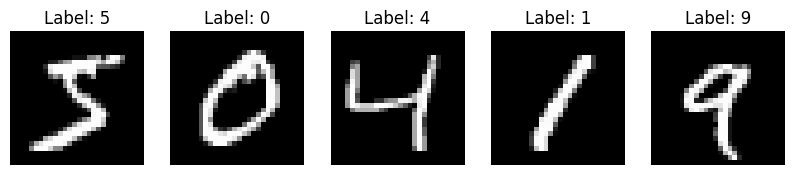

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.to_numpy(), mnist.target.astype(np.int32)
X, y = X[:20000], y[:20000]

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.show()

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def train_and_evaluate(model_type):
    print(f"Training model: {model_type}")
    classifier = MnistClassifier(model_type)
    classifier.train(X_train, y_train)

    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_type}: {acc:.4f}")

    y_test_np = np.array(y_test)

    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i, ax in enumerate(axes):
        ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test_np[i]}")
        ax.axis("off")
    plt.show()

Training model: rf
Accuracy for rf: 0.9557


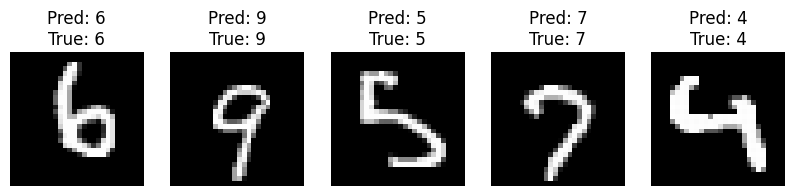

Training model: nn
Epoch [2/12], Loss: 1.8732
Epoch [4/12], Loss: 0.9528
Epoch [6/12], Loss: 0.5867
Epoch [8/12], Loss: 0.4651
Epoch [10/12], Loss: 0.4124
Epoch [12/12], Loss: 0.3781
Accuracy for nn: 0.9018


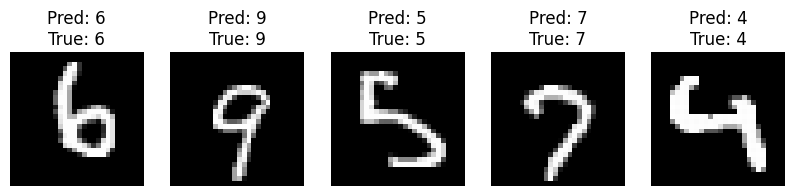

Training model: cnn
Epoch [1/5], Loss: 0.4402
Epoch [2/5], Loss: 0.1033
Epoch [3/5], Loss: 0.0652
Epoch [4/5], Loss: 0.0455
Epoch [5/5], Loss: 0.0323
Accuracy for cnn: 0.9805


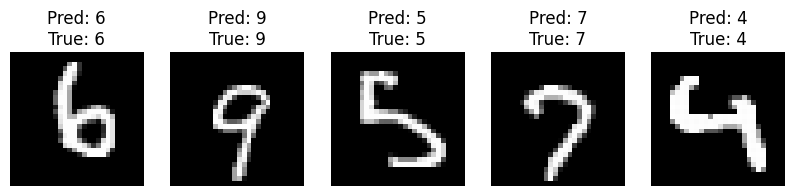

In [4]:
for model in ["rf", "nn", "cnn"]:
    train_and_evaluate(model)